## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read and display the mouse data and the study results. 
# Display so you know how which to combine the "on"
mouse_drug_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
#Example code:combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_mouse_data = pd.merge(mouse_drug_df, study_results_df, on="Mouse ID")

combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# sorting csv file to filter out duplicate values 
    # Example code: data.sort_values("First Name", inplace = True) 
combined_mouse_data.sort_values(["Mouse ID"], inplace = True)
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [4]:
# Checking the number of mice.
mice=combined_mouse_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [6]:
# Find the duplicate rows
    # Example Code: duplicateDFRow = dfObj[dfObj.duplicated()]
    # Example Code: print(duplicateDFRow)
duplicate_mouse_data = combined_mouse_data[combined_mouse_data.duplicated()]
duplicate_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice)==False]

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_mouse_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
# mean is the average
mean = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
# median is themiddle score 
median = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
# variance and standard deviaation is determing how far the data is spread apart
variance = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_drug_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem}) 
           
summary_drug_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

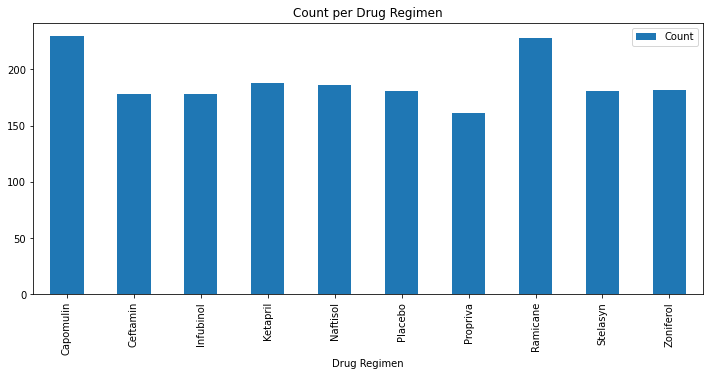

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_df = pd.DataFrame(combined_mouse_data.groupby(["Drug Regimen"]).count()).reset_index()


# Filter the DataFrame down only to those columns to chart
treatment_datapoints = total_mice_df[["Drug Regimen","Mouse ID"]]
treatment_datapoints = treatment_datapoints.rename(columns={"Mouse ID": "Count"})


# Set the index to be "Drug Regimen" so they will be used as labels
treatment_datapoints = treatment_datapoints.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
treatment_datapoints.plot(kind="bar", figsize=(12,5))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()


# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# select column to convert to list here
drug_regimens = summary_drug_df.index.tolist()
drug_regimens

In [12]:
# Convert the drug regimen count into a list
drug_regimen_count = (combined_mouse_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [13]:
x_axis = np.arange(len(drug_regimen_count))

<BarContainer object of 10 artists>

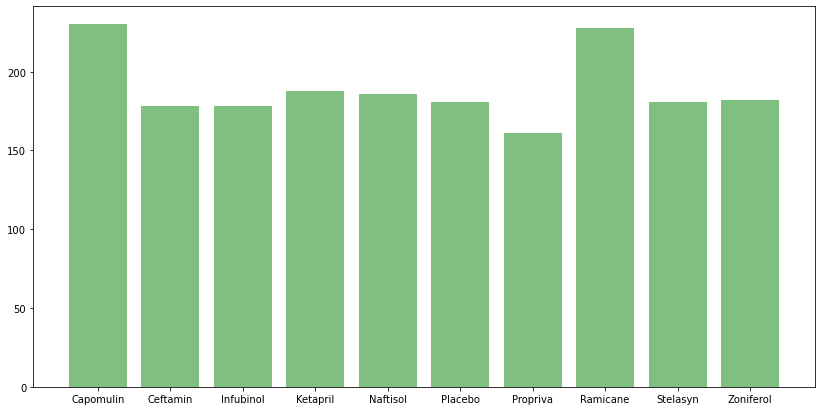

In [14]:
# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(14,7))
plt.bar(x_axis, drug_regimen_count, color='g', alpha=0.5, align="center")

In [15]:
#  Group by gender and get the number to plot
gender_groups = combined_mouse_data.groupby(["Mouse ID","Sex"])
gender_groups
mouse_genders_df = pd.DataFrame(gender_groups.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_genders_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
